In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv(r'C:\Users\Nikhil Valeti\Downloads\NIK.csv')
data.head(5)

,sr,rr,t,lm,bo,rem,sr.1,hr,sl
0,93.80,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.64,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.00,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.76,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.12,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0


## columns represent
### sr = 'snoring rate'
### rr = 'respiration rate'
### t = 'body temperature'
### lm = 'limb movement',
### bo = 'blood oxygen'
### rem = 'eye movement'
### sr.1 = 'sleeping hours',
### hr = 'heart rate

### sl = stress level

In [30]:
data.columns

Index(['snoring rate', 'respiration rate', 'body temperature', 'limb movement',
       'blood oxygen', 'eye movement', 'sleeping hours', 'heart rate',
       'stress level'],
      dtype='object')

In [4]:
data.isnull().sum()

sr      0
rr      0
t       0
lm      0
bo      0
rem     0
sr.1    0
hr      0
sl      0
dtype: int64

In [5]:
data.dtypes

sr      float64
rr      float64
t       float64
lm      float64
bo      float64
rem     float64
sr.1    float64
hr      float64
sl        int64
dtype: object

In [6]:
data.corr()

,sr,rr,t,lm,bo,rem,sr.1,hr,sl
sr,1.000000,0.976268,-0.902475,0.981078,-0.903140,0.950600,-0.920554,0.976268,0.975322
rr,0.976268,1.000000,-0.889237,0.991738,-0.889210,0.935572,-0.891855,1.000000,0.963516
t,-0.902475,-0.889237,1.000000,-0.896412,0.998108,-0.857299,0.954860,-0.889237,-0.962354
lm,0.981078,0.991738,-0.896412,1.000000,-0.898527,0.964703,-0.901102,0.991738,0.971071
bo,-0.903140,-0.889210,0.998108,-0.898527,1.000000,-0.862136,0.950189,-0.889210,-0.961092
rem,0.950600,0.935572,-0.857299,0.964703,-0.862136,1.000000,-0.893952,0.935572,0.951988
sr.1,-0.920554,-0.891855,0.954860,-0.901102,0.950189,-0.893952,1.000000,-0.891855,-0.973036
hr,0.976268,1.000000,-0.889237,0.991738,-0.889210,0.935572,-0.891855,1.000000,0.963516
sl,0.975322,0.963516,-0.962354,0.971071,-0.961092,0.951988,-0.973036,0.963516,1.000000


In [7]:
data.rename(columns={'sr': 'snoring rate', 'rr':'respiration rate', 't': 'body temperature', 'lm':'limb movement',
                            'bo':'blood oxygen', 'rem':'eye movement', 'sr.1':'sleeping hours', 'hr':'heart rate',
                            'sl':'stress level'}, inplace=True)
data.columns

Index(['snoring rate', 'respiration rate', 'body temperature', 'limb movement',
       'blood oxygen', 'eye movement', 'sleeping hours', 'heart rate',
       'stress level'],
      dtype='object')

Text(0.5, 1.0, 'Absolute Pearson Correlation between Different Features')

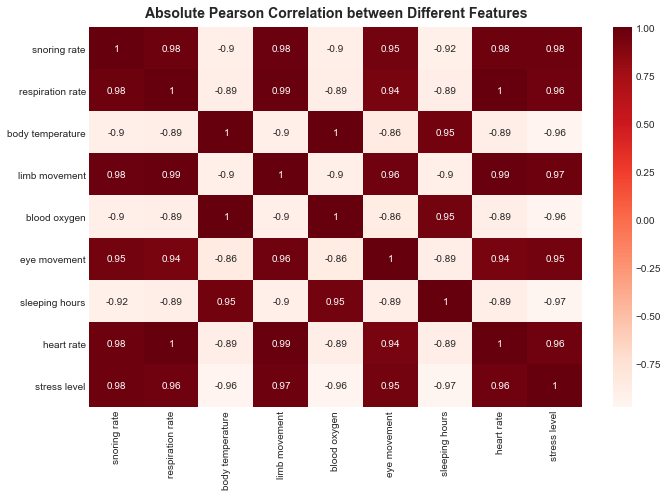

In [8]:
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

plt.figure(figsize = (10,7))
sns.heatmap(data.corr(), annot=True, cmap="Reds")
plt.title('Absolute Pearson Correlation between Different Features')

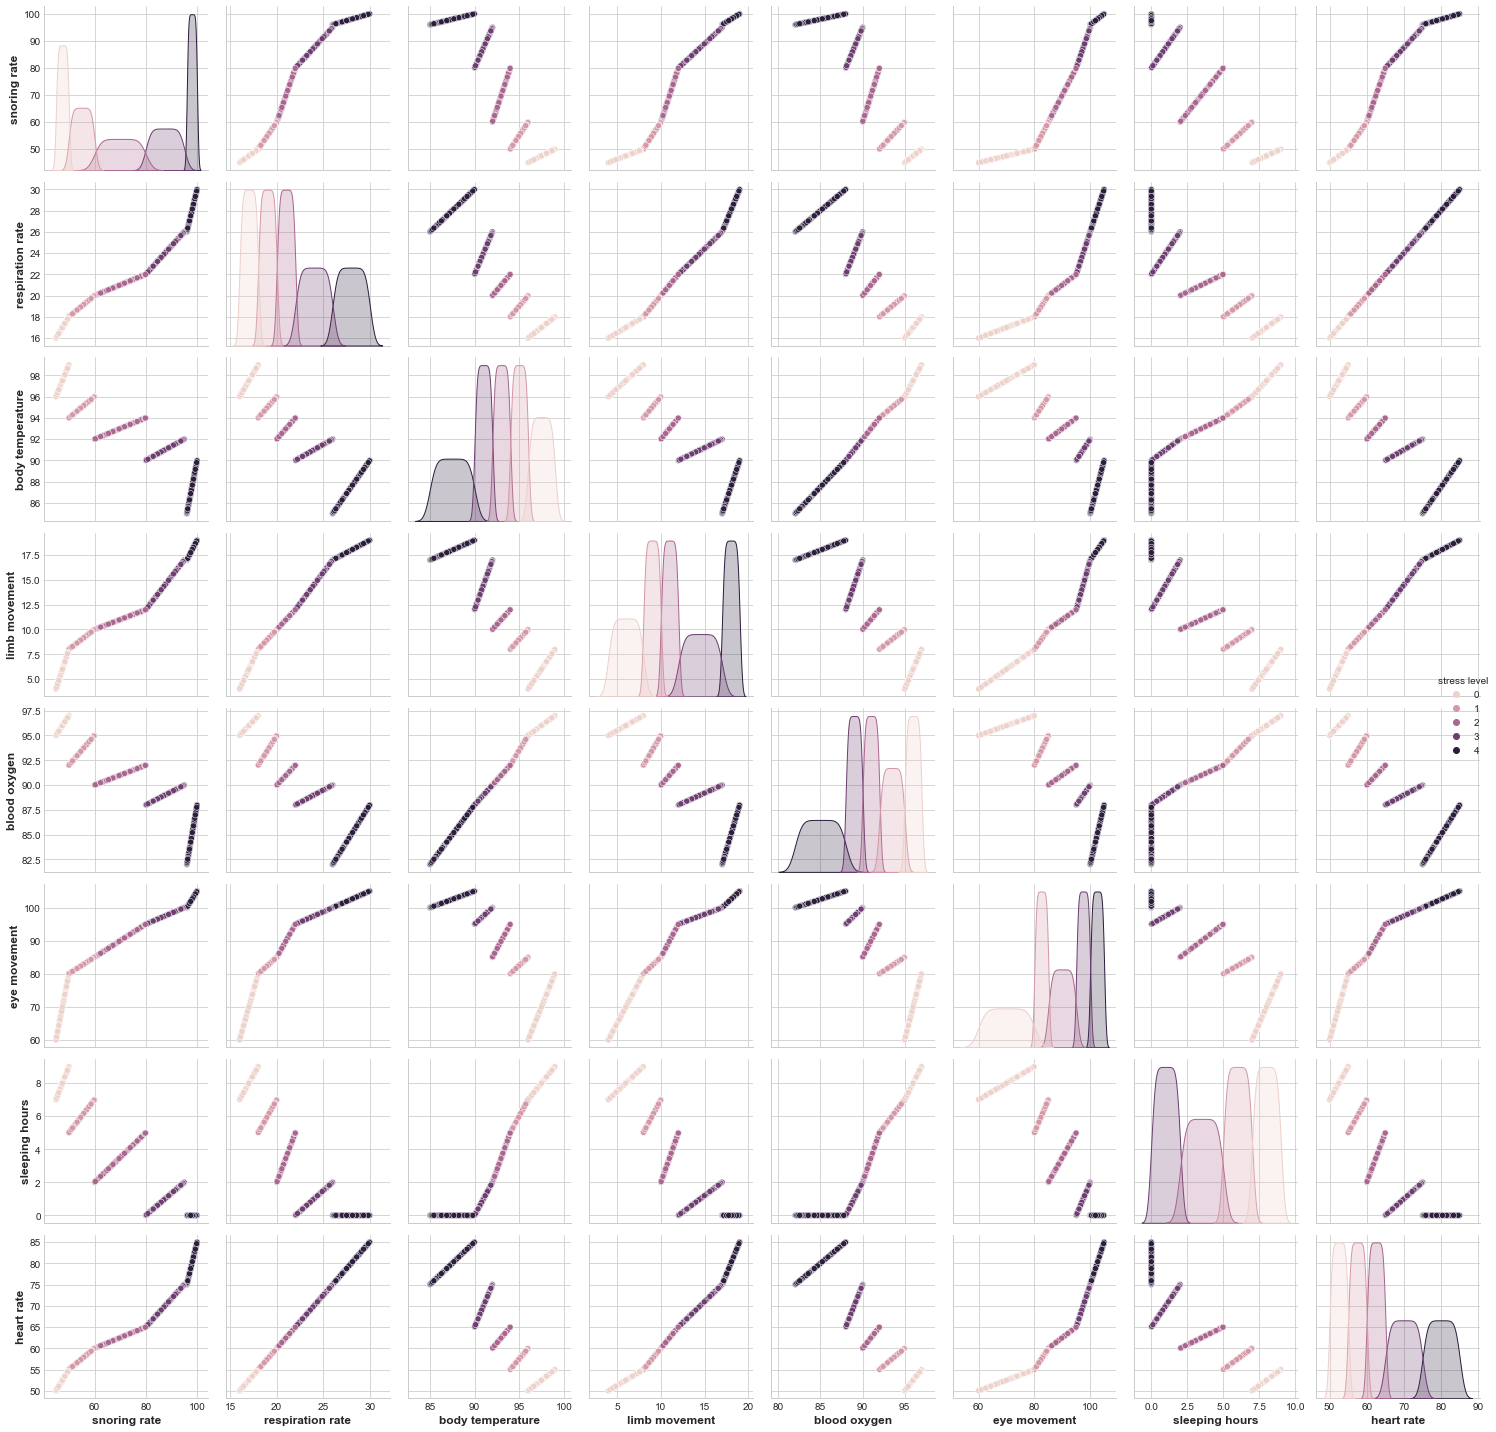

In [9]:
sns.pairplot(data, hue='stress level')

## Selection of target variable
### stress level is our target

In [10]:
X = data.drop('stress level', axis=1)
y = data['stress level']
y

0      3
1      3
2      1
3      3
4      0
      ..
625    2
626    0
627    4
628    1
629    2
Name: stress level, Length: 630, dtype: int64

## splitting data for training and testing


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

# decision tree

<AxesSubplot:>

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       0.95      1.00      0.97        19
           2       1.00      0.95      0.98        22
           3       1.00      1.00      1.00        28
           4       1.00      1.00      1.00        29

    accuracy                           0.99       126
   macro avg       0.99      0.99      0.99       126
weighted avg       0.99      0.99      0.99       126



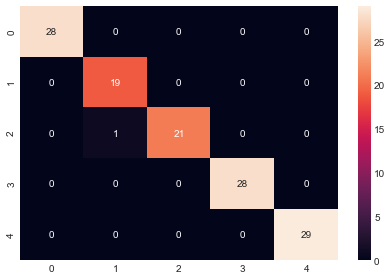

In [12]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
dtree = DecisionTreeClassifier(random_state=1503,max_depth=4)
dtree.fit(X_train, y_train)
pred = dtree.predict(X_test)
display(sns.heatmap(confusion_matrix(y_test,pred),annot=True))
print(classification_report(y_test,pred))

# SVM

<AxesSubplot:>

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        28
           1       0.90      1.00      0.95        19
           2       1.00      0.95      0.98        22
           3       1.00      1.00      1.00        28
           4       1.00      1.00      1.00        29

    accuracy                           0.98       126
   macro avg       0.98      0.98      0.98       126
weighted avg       0.99      0.98      0.98       126



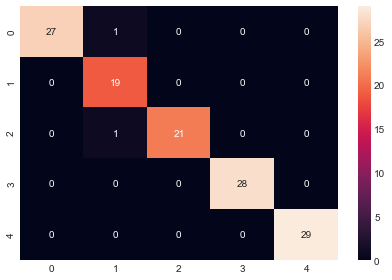

In [13]:

from sklearn.svm import SVC
svc = SVC(kernel='rbf')
svc.fit(X_train, y_train)
pred = svc.predict(X_test)
display(sns.heatmap(confusion_matrix(y_test,pred),annot=True))
print(classification_report(y_test,pred))

In [14]:
confusion_matrix(y_test, pred)

array([[27,  1,  0,  0,  0],
       [ 0, 19,  0,  0,  0],
       [ 0,  1, 21,  0,  0],
       [ 0,  0,  0, 28,  0],
       [ 0,  0,  0,  0, 29]], dtype=int64)

## Gradient boosing classifier

<AxesSubplot:>

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       0.95      1.00      0.97        19
           2       1.00      0.95      0.98        22
           3       1.00      1.00      1.00        28
           4       1.00      1.00      1.00        29

    accuracy                           0.99       126
   macro avg       0.99      0.99      0.99       126
weighted avg       0.99      0.99      0.99       126



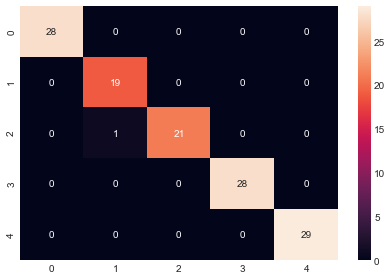

In [15]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
pred = gbc.predict(X_test)
display(sns.heatmap(confusion_matrix(y_test,pred),annot=True))
print(classification_report(y_test,pred))

In [16]:
confusion_matrix(y_test, pred)

array([[28,  0,  0,  0,  0],
       [ 0, 19,  0,  0,  0],
       [ 0,  1, 21,  0,  0],
       [ 0,  0,  0, 28,  0],
       [ 0,  0,  0,  0, 29]], dtype=int64)

# KNN 

<AxesSubplot:>

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00        22
           3       1.00      1.00      1.00        28
           4       1.00      1.00      1.00        29

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



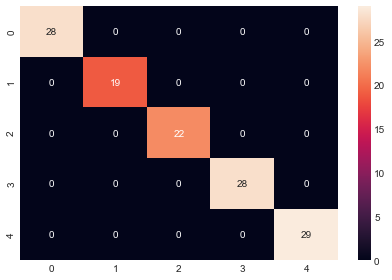

In [17]:

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
display(sns.heatmap(confusion_matrix(y_test,pred),annot=True))
print(classification_report(y_test,pred))

## SGD   Classifer

<AxesSubplot:>

              precision    recall  f1-score   support

           0       1.00      0.64      0.78        28
           1       0.54      1.00      0.70        19
           2       1.00      0.23      0.37        22
           3       0.55      1.00      0.71        28
           4       1.00      0.59      0.74        29

    accuracy                           0.69       126
   macro avg       0.82      0.69      0.66       126
weighted avg       0.83      0.69      0.67       126



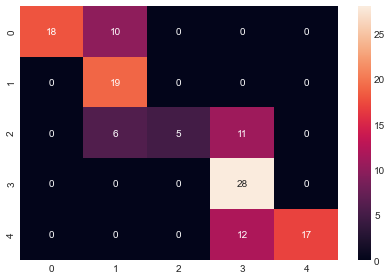

In [18]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
pred = sgd.predict(X_test)
display(sns.heatmap(confusion_matrix(y_test,pred),annot=True))
print(classification_report(y_test,pred))

In [19]:
from sklearn.metrics import accuracy_score
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.20, random_state = 0)
models = [dtree,svc, knn,sgd, gbc]
acc_scores = []
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    acc_model = round(accuracy_score(y_pred, y_val) * 100, 2)
    acc_scores.append(acc_model)
acc_scores

[99.21, 98.41, 100.0, 84.92, 99.21]

In [20]:
model_name = ['Decision Tree', 'SVC', 
              'k-Nearest Neighbors', 'Stochastic Gradient Descent', 'Gradient Boosting Classifier']
models_acc = pd.DataFrame({'Model name': model_name, 'Accuracy scores': acc_scores})
models_acc
models_acc = models_acc.set_index('Model name')
models_acc

,Accuracy scores
Model name,
Decision Tree,99.21
SVC,98.41
k-Nearest Neighbors,100.00
Stochastic Gradient Descent,84.92
Gradient Boosting Classifier,99.21


<AxesSubplot:xlabel='Model name'>

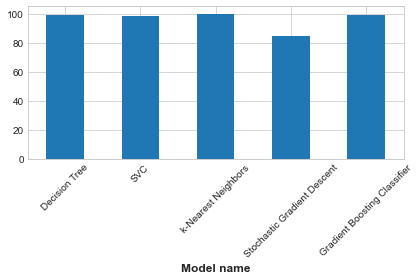

In [21]:
models_acc['Accuracy scores'].plot(kind = 'bar',x='index',rot='45')

## predictions 
### based on SVC 


In [22]:
snoring_rate =   71.56
respiration_rate = 45.32
body_temperature = 98.7
limb_movement = 5.23
blood_oxygen = 95.45
eye_movement =  78.56
sleeping_hours = 6.2
heart_rate = 60

In [28]:
dd = [[snoring_rate,respiration_rate,body_temperature,limb_movement,blood_oxygen,eye_movement,sleeping_hours,heart_rate]]
result = knn.predict(dd)
if result[0]==0:
    print("the stress level is ", result[0])
elif result[0]==1:
    print("the stress level is ", result[0])
elif result[0]==2:
    print("the stress level is ", result[0])
elif result[0]==3:
    print("the stress level is ", result[0])
else:
    print("the stress level is ", result[0])

the stress level is  2
